In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import json
import pdb

os.chdir('L:/analysis_nima/Python Scripts') #changing directory to ETL.py folder
from Analyses_ import ETL
from Analyses_ import findseq
%config Completer.use_jedi = False

### Input informations

In [2]:
all_address = ['L:/analysis_nima/250520_m18a/Batch_4', 'L:/analysis_nima/290520_m17a/Batch/extracells/Batch_2',
                'L:/analysis_nima/110620_m18b/new/Batch_3', 'L:/analysis_nima/050820_m21a/Batch_4',
                'L:/analysis_nima/030720_m20a/Batch_3', 'L:/analysis_nima/291020_m23a/Batch_2', 
               'L:/analysis_nima/210121_m24a/Batch_1']


# sampling rate for different mice
sfs = [30.995, 30.995, 30.955, 30.995, 30.995, 30.9576, 30.995]

# defining artifacts
custom_artifacts_1 = [[11007,11008,4]]
custom_artifacts_2 = [[11630,11947,0],[12000,12700,0],[4533,5154,14]]
custom_artifacts_3 = []
custom_artifacts_4 = [[1595,1845,0],[4609,4907,0],[7740,7983,0],[13795,14101,0],[16706,16973,0],
             [7266,7501,1],[11912,12219,1],[12703,13203,1],[13730,13909,1],[15097,15559,1],[17277,17519,1],
             [1416,1793,2],[3816,4123,2],[13254,13593,2],[15224,15703,2],[17668,18067,2],
             [7358,7521,3],[10240,10253,3],[13672,13748,3],[17306,17593,3],
             [5505,5939,4],[6222,6231,4],[16760,16820,4],[18450,18573,4],                           
             [1132,1357,7],[8653,8776,7],[9946,10391,7],
             [9068,9323,7],[13589,13623,7],[17394,17547,7],
             [1,140,8],[908,965,8],[7638,7665,8],[8014,8027,8],[14726,14922,8],[18022,18187,8],
             [1912,2381,9],[2920,2923,9],[7767,7819,9],[7864,7997,9],[9876,10197,9],[15206,15545,9],
             [6734,7220,10],[9668,9939,10],
             [8914,9290,11],[9562,9571,11],[12216,12339,11],
             [11492,11553,12],[13898,13919,12],
             [6298,6619,13],[12282,12795,13],[14406,14507,13],[14798,14875,13],
             [1,220,14],[1878,2108,14],[9872,9961,14],
             [4764,4813,15],[5564,5571,15],[15419,15595,15],[16003,16089,15],[16420,16482,15],
             [4240,4403,16],[9975,10077,16],[10274,10275,16],[13228,13451,16],[13805,13939,16],[14620,14664,16],[15764,15857,16],[18430,18537,16],
             [10425,10591,17],[11058,11709,17],[12232,12311,17],[12784,12804,17],[17000,17115,17],
             [10655,10825,18],[11993,12075,18],[12648,12685,18],[16013,16134,18],
             [14466,15015,19],[16876,17009,19],[18398,18573,19],
            [628,958,23],[7822,7976,23],[10298,10435,23],[13899,14241,23],[14466,14537,23],[15773,15848,23],[17664,17925,23],[18291,18426,23],
            [4309,4512,24],[5271,5467,24],[6450,6700,24],[7186,7593,24],
            [460,700,25],[1714,1725,25],[4045,4153,25],[13600,13699,25],
            [4434,4568,26],[5984,6167,26],
            [1770,1831,27],[4060,4064,27],
            [2000,2193,28],[11098,11334,28],
            [5921,5997,30],[8200,8210,30],[9189,9191,30],
            [686,852,31],[13375,13543,31],[14059,14334,31],[15808,15883,31],
            [10760,10800,33],[13942,14061,33],[17672,17738,33],
            [10576,10604,41]]
custom_artifacts_5 = [[3928,3971,0],[4584,4656,0],[7001,7119,0],[14144,14230,0],[14466,14501,0],[15591,15593,0],
            [559,603,1],[2187,2214,1],[3999,4054,1],[11749,11790,1],[17785,17839,1],
            [3403,3491,2],[11936,11980,2],
            [1397,1465,3],[13881,13889,3],[14510,14526,3],[18377,18441,3],                                                                                           
            [2585,2635,4], [6722,6771,4],[10867,10897,4],[16543,16615,4],
            [740,825,5],[2026,2113,5],[13025,13051,5],
            [798,863,6],[1795,1857,6],[3949,3980,6],[5190,5244,6],[10480,10547,6],[11219,11301,6],[12144,12191,6],[12690,12747,6],
            [1343,1441,7],[2618,2684,7],[2709,2713,7],[3427,3496,7],[4138,4185,7],[4532,4567,7],[5694,8768,7],[9513,9562,7],[12510,12644,7],[15000,15073,7],
            [96,140,8],[4175,4258,8],
            [409,564,9],[13291,13497,9],[16520,18573,9],
            [9968,10026,10],[14269,14335,10],[16569,16616,10],
            [404,557,11],[12553,12649,11],
            [503,598,13],[2832,2889,13],[13151,13218,13],[18276,18343,13],
            [769,954,14],[980,1001,14],[2324,2389,14],[4286,4297,14],
            [3349,3447,15],[6128,6221,15],
            [8475,8543,16],
            [9792,9840,17],
            [2984,3007,20],[4131,4183,20],[5025,5042,20],[6330,6355,20],[11818,11893,20],
            [6760,6875,21],
            [12871,12895,28],[13645,13667,28],[14232,14319,28],[14837,14849,28],[15521,15542,28],[16421,16445,28],[17032,17040,28]]
custom_artifacts_6 = [[8863,9191,4],
           [5389,5393,7],[5575,5607,7],[5754,5755,7],[5798,6000,7],
            [11050,11070,10],[12260,12280,10],
            [15125,15290,12],[16420,18160,10],
            [13280,13340,13],
            [8,23,15],[92,94,15],[481,505,15],
            [10035,10500,20],[11024,11044,20],
            [5794,5800,21],
            [3501,3507,22]]
custom_artifacts_7 = [[0,3418,0],[13116,13507,0],[14502,14872,0],
              [8000,9000,2],
              [1828,2638,3],[8631,12630,3],
              [1497,1988,4],[16470,17270,4],
              [5113,8239,5],                                                                                         
              [2322,2978,6],
              [12460,14890,7],
              [15600,16060,10],
              [4231,4848,11],[6434,6909,11],[9110,11550,11],
              [11890,12380,12],
              [8410,8820,13],
              [3026,3515,14],[13810,14170,14],
              [10910,12010,15]]  
artifacts = [custom_artifacts_1, custom_artifacts_2, custom_artifacts_3,
                custom_artifacts_4, custom_artifacts_5, custom_artifacts_6, custom_artifacts_7]

# cell removal 
remove_cell_1 = []
remove_cell_2 = []
remove_cell_3 = [62,63,64,65,66,67,68,69,70,80,81,160,161,162,163,164,167,194,195,202,203,204]
remove_cell_4 = [13,53,55,57,79,84,85,86,95,99,112,141,144,147,153,177,178,183,184,188,189,191,196,197,198,199,202,219,226,234,235]
remove_cell_5 = []
remove_cell_6 = [66,84,85,86]
remove_cell_7 = []
remove_cells = [remove_cell_1, remove_cell_2, remove_cell_3,
              remove_cell_4, remove_cell_5, remove_cell_6, remove_cell_7]
# mouse name
miceName = ['250520_m18a', '290520_m17a', '110620_m18b', '050820_m21a', '030720_m20a', '291020_m23a', '210121_m24a']


# saving figure 
save_fig = True # or False
fig_save_add = ''


# saving dataframes
save_file = True # or False
file_save_add = ''

### Necessary functions


In [3]:
def create_dict(mouseName, unitNr, data, hypnoState, sf, apply_artifact, removeCell):
    return {'mouseName':mouseName, 
            'unitNr':unitNr, 
            'data':data, 
            'hypnoState':hypnoState, 
            'samplingRate':sf, 
            'appliedArtifact':apply_artifact, 
            'removedCell':removeCell}

def create_list(data, hypno, mouseName, sf, apply_artifact, removeCell):
    
    # initialize list
    myList = []
    
    # looping over units
    for i in range(hypno.shape[1]):
        unit_seqs = []
        unit_seqs = findseq(hypno[:,i])

        for state, start, end, duration in zip(unit_seqs.state, unit_seqs.start_index, unit_seqs.end_index, unit_seqs.duration):
            myList.append(create_dict(mouseName=mouseName, unitNr=i, 
                                      data=data[start:end + 1, :, i], 
                                      hypnoState=state, sf = sf, 
                                      apply_artifact=apply_artifact, 
                                      removeCell=removeCell))
            
    return myList

def get_data(address, sf):
    
    # using ETL from Analysis file
    data_load = ETL(sf = sf, ending='.mat', unit_length=600)
    data_load.get_path(address)
    data_load.load_files()

    # get data values
    data = data_load.get_data_values()
    hypno = data_load.get_hypno()
    
    print(f'data and hypno shapes in file {address} are: {data.shape}, {hypno.shape}')
    
    return data, hypno

def find_type2_locations(dictLists, pattern = [0,-2], cond1_min=100, cond1_max = 10000, cond2_min = 100, cond2_max = 10000):
    
    """
    This function takes dictionary list as input and based on given pattern it returns 
    the locations in the list where that pattern happens. # Location of first element of the pattern.
    
    dictLists: List of dictionaries
    pattern: pattern to search 0--> awake, -2-->SWS, -3-->REM
    cond1_min: min epoch duration of the first element of the pattern
    cond1_max: max epoch duration of the first element of the pattern
    cond2_min: min epoch duration of the second element of the pattern
    cond2_max: max epoch duration of the second element of the pattern
    Hint: all condition will be calculated in sample based NOT in time based
    """
    # first, reading all hypno states to a list
    all_states = [myDict['hypnoState'] for myDict in dictLists]
    
    # second, control condition on each epoch based on condition on first and second elements of the pattern.
    # first element
    window_cond1 = [(myDict['epochDuration']>cond1_min and myDict['epochDuration']<cond1_max) for myDict in dictLists]
    
    # second element
    window_cond2 = [(myDict['epochDuration']>cond2_min and myDict['epochDuration']<cond2_max) for myDict in dictLists]
    
    # reading all mouse names (needs to be checked to see if pattern comming from same mouse)
    all_names = [myDict['mouseName'] for myDict in dictLists]
    
    # finding unique mouse name
    # unique_name = np.unique(all_names)
    
    # finding the locations matching to a given pattern
    locs = np.where((np.array(all_states[:-1]) == pattern[0]) & # first element of pattern
                     (np.array(all_states[1:]) == pattern[1]) & # second element of the pattern
                     (np.array(all_names[:-1] == np.array(all_names[1:]))) & # pattern comming from same mouse
                     np.array(window_cond1[:-1]) & # condition on first element
                     np.array(window_cond2[1:]))[0] # condition on second element
    
    return locs

def find_type3_locations(dictLists, pattern = [-2,-3, -2], cond1_min=100, cond1_max = 10000, 
                         cond2_min = 100, cond2_max = 10000, cond3_min = 100, cond3_max = 10000):
    
    """
    This function takes dictionary list as input and based on given pattern it returns 
    the locations in the list where that pattern happens. # Location of first element of the pattern.
    
    dictLists: List of dictionaries
    pattern: pattern to search 0--> awake, -2-->SWS, -3-->REM
    cond1_min: min epoch duration of the first element of the pattern
    cond1_max: max epoch duration of the first element of the pattern
    cond2_min: min epoch duration of the second element of the pattern
    cond2_max: max epoch duration of the second element of the pattern
    Hint: all condition will be calculated in sample based NOT in time based
    """
    # first, reading all hypno states to a list
    all_states = [myDict['hypnoState'] for myDict in dictLists]
    
    # second, control condition on each epoch based on condition on first and second elements of the pattern.
    # first element
    window_cond1 = [(myDict['epochDuration']>cond1_min and myDict['epochDuration']<cond1_max) for myDict in dictLists]
    
    # second element
    window_cond2 = [(myDict['epochDuration']>cond2_min and myDict['epochDuration']<cond2_max) for myDict in dictLists]
    
    # third element
    window_cond3 = [(myDict['epochDuration']>cond3_min and myDict['epochDuration']<cond3_max) for myDict in dictLists]
    
    # reading all mouse names (needs to be checked to see if pattern comming from same mouse)
    all_names = [myDict['mouseName'] for myDict in dictLists]
    
    # finding unique mouse name
    # unique_name = np.unique(all_names)
    
    # finding the locations matching to a given pattern
    locs = np.where((np.array(all_states[:-1]) == pattern[0]) & # first element of pattern
                     (np.array(all_states[1:]) == pattern[1]) & # second element of the pattern
                     (np.array(all_names[:-1] == np.array(all_names[1:]))) & # pattern comming from same mouse
                     np.array(window_cond1[:-1]) & # condition on first element
                     np.array(window_cond2[1:]))[0] # condition on second element
    
    # getting all locations matching 3 pattern
    temp_loc3 = []
    temp_loc3 = np.where(np.array(all_states) == pattern[2])[0]
    
    out = []
    
    # searching for right candidates
    for i, can in enumerate(locs + 1):
        
        temp = []
        temp = np.where(temp_loc3 > can)[0] # all locations in pattern 3
        #pdb.set_trace()
        if temp.any() and all_names[temp_loc3[temp[0]]] == all_names[can] and window_cond3[temp_loc3[temp[0]]]:
            out.append([can - 1, can, temp_loc3[temp[0]]])
    
    return np.vstack(out)

def applyArtifacts(data, artifacts):
    if artifacts:
        for artifact in artifacts:
            data[artifact[0]:artifact[1], :, artifact[2]] = 0
        
        return data
    return data

def removeCells(data, cells):
    if cells:
        return np.delete(data, cells, axis = 1)
    return data

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def avg_firing(data, sf):
    # return in avgerage in second
    avg = np.nansum(np.where(data>0 , 1, np.nan), axis = 0)/(data.shape[0]/sf)
    return np.where(avg>0, avg, np.nan)

def avg_amplitude(data):
    # return in avgerage amplitude
    return np.nanmean(np.where(data>0 , data, np.nan), axis = 0)

def nrActiveCells(data):
    return len(data[~np.isnan(data)])
    
def div_avg_firing(data, sf, n =3):
    spaces = np.linspace(0, data.shape[0], n+1, dtype = int)
    avg = [avg_firing(data=data[spaces[i]:spaces[i+1],:], sf=sf) for i in range(n)]
    return avg
    
def div_avg_amplitude(data, n =3):
    spaces = np.linspace(0, data.shape[0], n+1, dtype = int)
    avg = [avg_amplitude(data=data[spaces[i]:spaces[i+1],:]) for i in range(n)]
    return avg

def top_least(data, prc = 10, top = True):
    
    """
    This function return indices and values of top or least x% of given data
    
    data: array
    prc: percentage
    top: if True returns top if false returns least
    """
    data = np.array(data)
    
    indx = np.argsort(data)
    
    notNans = ~np.isnan(data[indx])
    
    selc = max(1, int(len(data) * (prc/100)))
    
    if top:
        return indx[notNans][-selc:], data[indx[notNans]][-selc:]
    
    if not top:
        return indx[notNans][:selc], data[indx[notNans]][:selc]
    
    
    
    
def cellID(indices, mouse_name, all_mice_names):
    
    '''
    This function return explicit cell ID based on list of indices and mouse name
    '''
    
    all_mice_names = np.unique(all_mice_names)
    
    Dict = {}
    for i, name in enumerate(all_mice_names):
        Dict.update({name: (i+1) * 1000})
    
    return  indices + Dict[mouse_name]

### Creating base data structure and loading data and hypno to it
####    If ncessary first apply artifact on data or remove cells then create data structure

In [4]:
apply_artifact = True
rmCell = True

data_list = []
for address, sf, mouse_name, artifact, remove_cell in zip(all_address, sfs, miceName, artifacts, remove_cells):
    
    #clear and read data
    data = []; hypno = []
    data, hypno = get_data(address = address, sf = sf)
    
    if apply_artifact:
        data = applyArtifacts(data=data, artifacts=artifact)
    
    if rmCell:
        data = removeCells(data=data, cells = remove_cell)
    
    # creat per mouse list
    data_list.extend(create_list(data = data, hypno = hypno, mouseName = mouse_name, 
                                 sf = sf, apply_artifact=apply_artifact, removeCell=rmCell))

Your entered path is L:/analysis_nima/250520_m18a/Batch_4
All files in the given path 

['unit01.mat', 'unit02.mat', 'unit03.mat', 'unit04.mat', 'unit05.mat', 'unit06.mat', 'unit07.mat', 'unit08.mat', 'unit09.mat', 'unit10.mat', 'unit11.mat', 'unit12.mat', 'unit13.mat', 'unit14.mat', 'unit15.mat', 'unit16.mat', 'unit17.mat', 'unit18.mat', 'unit19.mat', 'unit20.mat', 'unit21.mat', 'unit22.mat', 'unit23.mat', 'unit24.mat', 'unit25.mat', 'unit26.mat', 'unit27.mat', 'unit28.mat', 'unit29.mat', 'unit30.mat', 'unit31.mat', 'unit32.mat', 'unit33.mat', 'unit34.mat', 'unit35.mat', 'unit36.mat', 'unit37.mat', 'unit38.mat', 'unit39.mat', 'unit40.mat', 'unit41.mat', 'unit42.mat', 'unit43.mat', 'unit44.mat', 'unit45.mat']  Number of all files 45
Data are loaded 

Start reading units 

unit length is 600 sec, data length is 18597 samples, number of cells are 236 

Finished reading units 

Start reading hypno files 

Finished reading hypno 

Location-Time information
data and hypno shapes in file L:/

### Adding analyses as dictionary key, value pairs


In [5]:
# add average firing rate to the dictionary
[data_dict.update({'avg_firing_perSecond':avg_firing(data = data_dict['data'], 
                                                            sf=data_dict['samplingRate'])}) for data_dict in data_list];

In [6]:
# add average amplitude to the dictionary
[data_dict.update({'avg_amplitude':avg_amplitude(data = data_dict['data'])}) for data_dict in data_list];

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:167: RuntimeWarning: Mean of empty slice


In [7]:
# add top and least firing rate 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_avg_firing':top_least(data=data_dict['avg_firing_perSecond'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [8]:
# add top and least amplitude 
fraction = 20

#top
[data_dict.update({'top' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = True)}) for data_dict in data_list];

#least
[data_dict.update({'least' + str(fraction) + '_amplitude':top_least(data=data_dict['avg_amplitude'], 
                                                                   prc = fraction, top = False)}) for data_dict in data_list];

In [9]:
# add divided average firing rate to the dictionary
[data_dict.update({'div_avg_firing_perSecond':div_avg_firing(data = data_dict['data'], 
                                                             sf=data_dict['samplingRate'], 
                                                             n = 3)}) for data_dict in data_list];

In [10]:
# add divided average firing rate to the dictionary (n subdata)
[data_dict.update({'div_avg_amplitude':div_avg_amplitude(data = data_dict['data'], n=3)}) for data_dict in data_list];

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:167: RuntimeWarning: Mean of empty slice


In [11]:
# add epoch duration in sample
[data_dict.update({'epochDuration': data_dict['data'].shape[0]}) for data_dict in data_list];

In [12]:
# add nr of active cell per epoch
[data_dict.update({'nrActiveCells': nrActiveCells(data = data_dict['avg_amplitude'])}) for data_dict in data_list];

In [13]:
# add nr of total cells per epoch
[data_dict.update({'nrTotalCells': data_dict['data'].shape[1]}) for data_dict in data_list];

In [14]:
# adding location of type2 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type2_locations = find_type2_locations(dictLists=data_list, pattern=[-2, -3], 
                                       cond1_min= 900, cond1_max=10000, 
                                       cond2_min=900, cond2_max=10000)



[data_dict.update({'type2': 0}) for data_dict in data_list]

for i, data_dict in enumerate(data_list):
    if i in type2_locations:
        data_dict.update({'type2':1})
        data_list[i+1].update({'type2':2})

In [15]:
# adding location of type3 pattern to the dictionaries


# type2: 1 epoch is first element of the pattern
#        2 epoch is second element of the pattern
#        3 epoch is third element of the pattern
#        0 epoch is not involved in the pattern


# finding locations (each location is the location of first element of the pattern)
type3_locations = find_type3_locations(dictLists=data_list, pattern=[-2, 0, -2], 
                                       cond1_min= 900, cond1_max=10000, 
                                       cond2_min=900, cond2_max=10000, 
                                       cond3_min=900, cond3_max=10000)



[data_dict.update({'type3': 0}) for data_dict in data_list]

for i in range(type3_locations.shape[0]):
    
    # put all pattern locations in the first element of the pattern
    data_list[type3_locations[i,0]].update({'type3':type3_locations[i,:]})
    

#### PerCell


In [16]:
# plotting average firing rate 

avg_firing_vs_epoch_duration = pd.DataFrame()

for my_dict in data_list:
    avg_firing_vs_epoch_duration = avg_firing_vs_epoch_duration.append(pd.DataFrame({"hypno_state":my_dict["hypnoState"], 
                                                                        "avg_firing":my_dict["avg_firing_perSecond"], 
                                                                        "epoch_duration":my_dict["epochDuration"] / my_dict["samplingRate"]}), ignore_index = True)

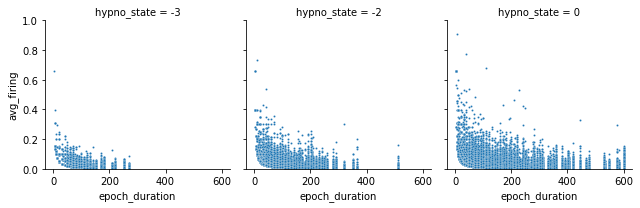

In [17]:
grid = sns.FacetGrid(avg_firing_vs_epoch_duration, col="hypno_state", palette="tab20c", height=3,ylim=(0, 1))
grid.map(sns.scatterplot, "epoch_duration", "avg_firing", s=4)
#if save_fig:
  #  plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/firing_ampl_duration_correlation/per_cell_correlation_fr.pdf', dpi=300, format='pdf')

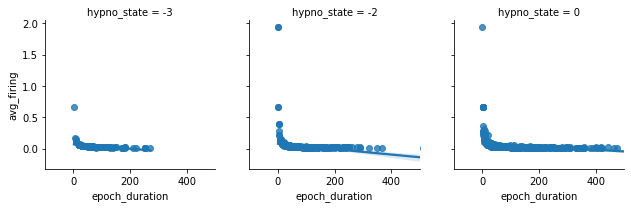

In [30]:
grid = sns.FacetGrid(avg_firing_vs_epoch_duration, col="hypno_state", palette="tab20c", height=3,xlim=(-100, 500))
grid.map(sns.regplot, "epoch_duration", "avg_firing")
if save_file:
    avg_firing_vs_epoch_duration.to_csv(path_or_buf=file_save_add + 'L:/analysis_nima/statistics_epoch_based/duration_per_epoch.csv')

#### PerEpoch


In [29]:
# plotting average firing rate 

avg_firing_vs_epoch_duration = pd.DataFrame()

for my_dict in data_list:
    avg_firing_vs_epoch_duration = avg_firing_vs_epoch_duration.append(pd.DataFrame({"hypno_state":my_dict["hypnoState"], 
                                                                        "avg_firing":[np.nanmean(my_dict["avg_firing_perSecond"])], 
                                                                        "epoch_duration":my_dict["epochDuration"] / my_dict["samplingRate"]}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


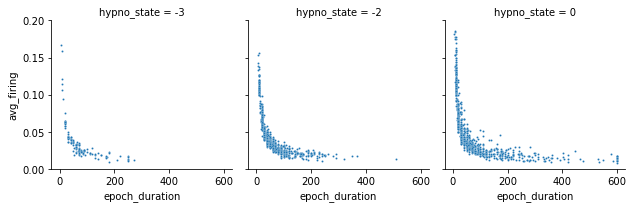

In [75]:
grid = sns.FacetGrid(avg_firing_vs_epoch_duration, col="hypno_state", palette="tab20c", height=3,ylim=(0, 0.2))
grid.map(sns.scatterplot, "epoch_duration", "avg_firing", s=4)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/firing_ampl_duration_correlation/per_epoch_correlation_fr.pdf', dpi=300, format='pdf')

### Amplitude

#### PerCell

In [63]:
# plotting amplitude

avg_firing_vs_epoch_duration = pd.DataFrame()

for my_dict in data_list:
    avg_firing_vs_epoch_duration = avg_firing_vs_epoch_duration.append(pd.DataFrame({"hypno_state":my_dict["hypnoState"], 
                                                                        "avg_firing":my_dict["avg_amplitude"], 
                                                                        "epoch_duration":my_dict["epochDuration"] / my_dict["samplingRate"]}), ignore_index = True)

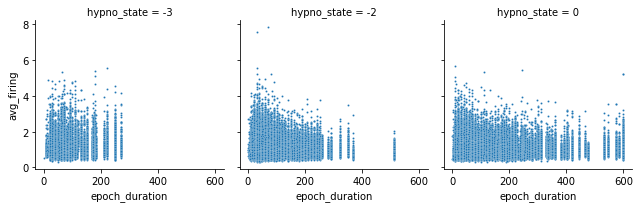

In [65]:
grid = sns.FacetGrid(avg_firing_vs_epoch_duration, col="hypno_state", palette="tab20c", height=3)
grid.map(sns.scatterplot, "epoch_duration", "avg_firing", s=4)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/firing_ampl_duration_correlation/per_cell_correlation_amp.pdf', dpi=300, format='pdf')

#### PerEpoch


In [66]:
# plotting amplitude

avg_firing_vs_epoch_duration = pd.DataFrame()

for my_dict in data_list:
    avg_firing_vs_epoch_duration = avg_firing_vs_epoch_duration.append(pd.DataFrame({"hypno_state":my_dict["hypnoState"], 
                                                                        "avg_firing":[np.nanmean(my_dict["avg_amplitude"])], 
                                                                        "epoch_duration":my_dict["epochDuration"] / my_dict["samplingRate"]}), ignore_index = True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


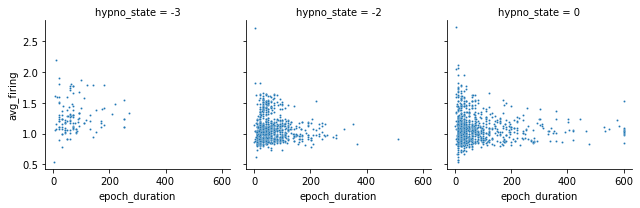

In [68]:
grid = sns.FacetGrid(avg_firing_vs_epoch_duration, col="hypno_state", palette="tab20c", height=3)
grid.map(sns.scatterplot, "epoch_duration", "avg_firing", s=4)
if save_fig:
    plt.savefig(fig_save_add + 'L:/analysis_nima/epoch_based_analysis/firing_ampl_duration_correlation/per_epoch_correlation_amp.pdf', dpi=300, format='pdf')

In [81]:
data_list[0].keys()

dict_keys(['mouseName', 'unitNr', 'data', 'hypnoState', 'samplingRate', 'appliedArtifact', 'removedCell', 'avg_firing_perSecond', 'avg_amplitude', 'top20_avg_firing', 'least20_avg_firing', 'top20_amplitude', 'least20_amplitude', 'div_avg_firing_perSecond', 'div_avg_amplitude', 'epochDuration', 'nrActiveCells', 'nrTotalCells', 'type2', 'type3'])